## Road Gradient Problem 

`h_i` &rarr; height of the roadbed at a distance `d_i`

`e_i` &rarr; current elevation of the roadbed at a distance `d_i`

Cuts &rarr; Roadbed existing <ins>below</ins> the elevation

Fills &rarr; Roadbed existing <ins>above</ins> the elevation 

Both of these contribute to the cost of the construction and they are functions of $(u)_+$. 

Here, $(u)_+ = max(u, 0)$

Cost function $C = \phi^{cut}(u) + \phi^{fill}(u)$ 

$\phi^{cut}(u) = 12 (u)_+^{2} + (u)_+$

$\phi^{fill}(u) = 2(u)_+^{2} + 30(u)_+$


### Imports

In [11]:
import cvxpy as cvpy
import numpy as npy 
from matplotlib import pyplot as plt

### Given Data 

In [12]:
# The road is 100 mts long
n = 100 

# elevation values 
e = []
for i in range(1, n+1):
  e.append(5 * npy.sin((i*(npy.pi)*3)/100) + npy.sin(i*10*(npy.pi)/100))

# discretizing unit 
d = 1 

# maximum derivative values (constraints)
D1 = 0.080
D2 = 0.025
D3 = 0.005

### Solving the convex optimization problem 

In [13]:
h = cvpy.Variable(n)

u = h - e

list_fillcost = 2 * cvpy.square(cvpy.pos(u)) + 30 * cvpy.pos(u)
fill_cost = cvpy.sum(list_fillcost)

list_cutcost = 12 * cvpy.square(cvpy.neg(u)) + cvpy.neg(u)
cut_cost = cvpy.sum(list_cutcost)

total_cost = fill_cost + cut_cost

objective = cvpy.Minimize(total_cost)

### Formulating Constraints

## Formulating Constraints 

The following calculations are valid because it is discretized. 

The first derivative can be calculated by the slope formula :

 $\cfrac{h_{i+1} - h_i}{d}$, here $d$ is the discretizing unit

The second derivative can be calculated by the change in slope between $h_{i-1}, h_{i}$ and $h_{i}, h_{i+1}$. 

Slope between $h_{i-1}$ and $h_{i}$ is $\cfrac{h_{i} - h_{i-1}}{d}$

Slope between $h_{i}$ and $h_{i+1}$ is $\cfrac{h_{i+1} - h_{i}}{d}$

Rate of change of slope = $\cfrac{\cfrac{h_{i+1} - h_{i}}{d} - \cfrac{h_{i} - h_{i-1}}{d}}{d}$

Second derivative = $\cfrac{h_{i+1} + h_{i-1} - 2h_{i}}{d^2}$

Similarly for the third derivative, we calculate the rate of change of curvature between $(h_{i-2}, h_{i-1}, h_{i})$ and $(h_{i-1}, h_{i}, h_{i+1})$

Rate of change of curvature = $\cfrac{\cfrac{h_{i+1} + h_{i-1} - 2h_{i}}{d^2} - \cfrac{h_{i} + h_{i-2} - 2h_{i-1}}{d^2}}{d}$

Third derivative = $\cfrac{h_{i+1} - 3h_{i} + 3h_{i-1} - h_{i-2}}{d^3}$


## Formulating Convex Optimization Problem 

Minimize $C$ subject to :  

  |Slope| <= $D^{(1)}$

  |Curvature| <= $D^{(2)}$
  
  |Third Derivative| <= $D^{(3)}$

In [20]:
constraints = []

constraints = [cvpy.abs(cvpy.diff(h)) <= D1*d, cvpy.abs(cvpy.diff(h, 2)) <= D2*d*d, cvpy.abs(cvpy.diff(h, 3)) <= D3*d*d*d]

problem = cvpy.Problem(objective, constraints)

# OSQP solver fails, so we use the ECOS solver
result = problem.solve(solver = cvpy.ECOS)

print("The minimum overall construction cost is : ", result)
print("The fill cost is : ", fill_cost.value)
print("The cut cost is : ", cut_cost.value)

The minimum overall construction cost is :  7562.815672259892
The fill cost is :  5291.880036632339
The cut cost is :  2270.9355353362907


### Plot - (i) : Cost function vs $-u$ 

### Plot - (ii) : Fill function vs $u$

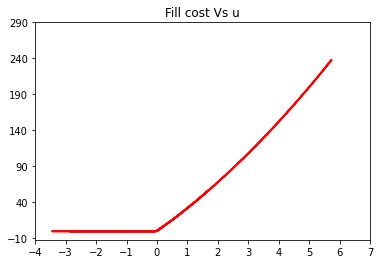

Text(0.5, 1.0, 'Cut cost Vs -u')

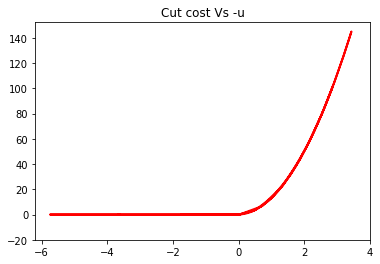

In [24]:
plt.plot(u.value, list_fillcost.value, color = 'red', linewidth = '2', mfc = 'white')

# npy.arange can be changed to (1 : 10 : 0.1) according to the question
plt.xticks(npy.arange(-4, 8, 1))
plt.yticks(npy.arange(-10, 300, 50))
plt.title("Fill cost Vs u")
plt.show()

plt.plot(-(u.value), list_cutcost.value, color = 'red', linewidth = '2', mfc = 'white')

# npy.arange can be changed to (1 : 10 : 0.1) according to the question
plt.xticks(npy.arange(-6, 6, 2))
plt.yticks(npy.arange(-20, 160, 20))
plt.title("Cut cost Vs -u")

### From the above graphs, we can see that both graphs are convex because the curve lies below any line segment joining two points. 

### Plots of $h_i$, $e_i$, $h_i - e_i$

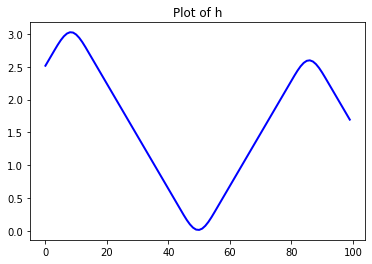

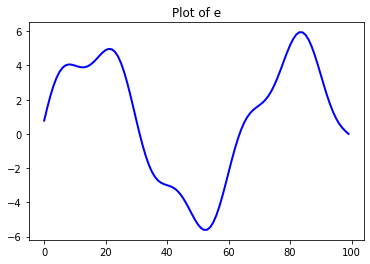

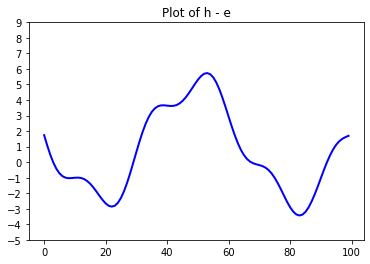

In [17]:
plt.plot(h.value, color = 'blue', linewidth = '2', mfc = 'white')
plt.title("Plot of h")
plt.show()

plt.plot(e ,color = 'blue', linewidth = '2', mfc = 'white')
plt.title("Plot of e")
plt.show()

plt.plot(u.value, color = 'blue', linewidth = '2', mfc = 'white')
plt.title("Plot of h - e")
plt.yticks(npy.arange(-5, 10, 1))
plt.show()